In [145]:
# Applied-Plotting-Charting-and-Data-Representation-in-Python
# Module 2 Week 4 Assignment
# Yanshu Li

In [146]:
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib notebook

# Air Quality in Bay Area Affected by California Wildfires in 2018

## Air quality in Bay Area can be deterioted due to California Wildfires

Air quality data in this study is within SF Bay Area by city. Partical Mass 2.5 data is used to represent air quality. It is assumed that all California wildfires can affect the Bay Area due to air movement. 

12 months in 2018 were chosen because the monthly variation can correlate with wildfire occurrences through a year. 


Data source #1: http://www.baaqmd.gov/about-air-quality/current-air-quality/air-monitoring-data/?&ParameterId=316#/aqi?id=316&date=2018-07-28&view=monthly
Collected and made into Excel file: SFBayArea_PM25_2018.xlsx
    
Data source #2: Table named "Wildfires"  https://en.wikipedia.org/wiki/2018_California_wildfires    
Made into Excel file: 2018_California_wildfires.xlsx

Conclusions:

San Francisco Bay Area is genereally free from severe wildfires in California due to being located very close to the Pacific ocean. However, the air quality is impacted by wildfires to some extents. The study is aimed to visualize how bad the air quality (PM 2.5 index) can be impacted by wildfires in northern California.

By overlaying air quality and wildfires, we can see there is a good correlation between the two, meaning that wildfires do have a negative impact on air quality. Air quality is being represented by PM 2.5 index (low is healthy, high is unhealthy). In months with no or little wildfires (Jan through May), PM 2.5 is recovering from previous year and reamining low. In months with many wildfire occurrences, PM 2.5 is very high.

The graph has a couple of disadvantages. First, only 2018 data is presented. Wildfires and air quality tend to cycle through the year, so having 2017 and 2019 data can give better knowledge on the cycle. Secondly, wildfire data is only occurrences, without taking burning period into account. Thirdly, location, distance, wind, and more complicated geographical factors were not considered.

In [147]:
# Load relevant data
air = pd.read_excel("G:\我的云端硬盘\DS\Intro Data Science in Python\Module2\Week4\SFBayArea_PM25_2018.xlsx")
fire = pd.read_excel(r"G:\我的云端硬盘\DS\Intro Data Science in Python\Module2\Week4\2018_California_wildfires.xlsx")
nocal = pd.read_excel(r"G:\我的云端硬盘\DS\Intro Data Science in Python\Module2\Week4\NoCal_County_list.xlsx", header=None)

In [148]:
air.head()

,Monthly,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,High AQI
0,Napa - Napa Valley College,82,54,38,57,60,52,55,79,55,54,183,68,183
1,Napa,89,64,52,62,49,?,?,?,?,?,?,?,89
2,Pleasanton - Owens Ct.,?,?,0,56,62,59,57,123,67,67,215,63,215
3,San Rafael,123,62,38,57,61,52,59,98,58,57,218,83,218
4,Sebastopol,84,56,32,46,57,45,51,65,48,30,226,60,226


In [149]:
# Convert missing values to NaN and drop those rows (only 2 rows)
air = air[air.isin(['?']) == False].dropna() 
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec']
air = air[months].astype('int64')
# Use mean data
air_mean = air.mean()

In [150]:
fire.head()

,Name,County,Acres,Start date,Containment date
0,Pleasant,Inyo,2070,2018-02-18,2018-04-03
1,Moffat,Inyo,1265,2018-04-19,2018-05-21
2,Nees,Merced,1756,2018-05-02,2018-05-17
3,Patterson,Riverside,1261,2018-05-17,2018-05-21
4,Airline,San Benito,1314,2018-06-04,2018-06-14


In [151]:
# Extract month from date
fire['Start_m'] = fire['Start date'].dt.month
fire['Contain_m'] = fire['Containment date'].dt.month
# Select only NoCal counties
fire = fire[fire['County'].isin(nocal[0])]
# Groupby by Start date, using months
fire1 = fire.groupby('Start_m').sum()['Acres']
# month 1, 3, 12 do not have data, meaning no wildfire occurred in those months
fire1.loc[1] = 0
fire1.loc[3] = 0
fire1.loc[12] = 0
fire1 = fire1.sort_index()

<IPython.core.display.Javascript object>


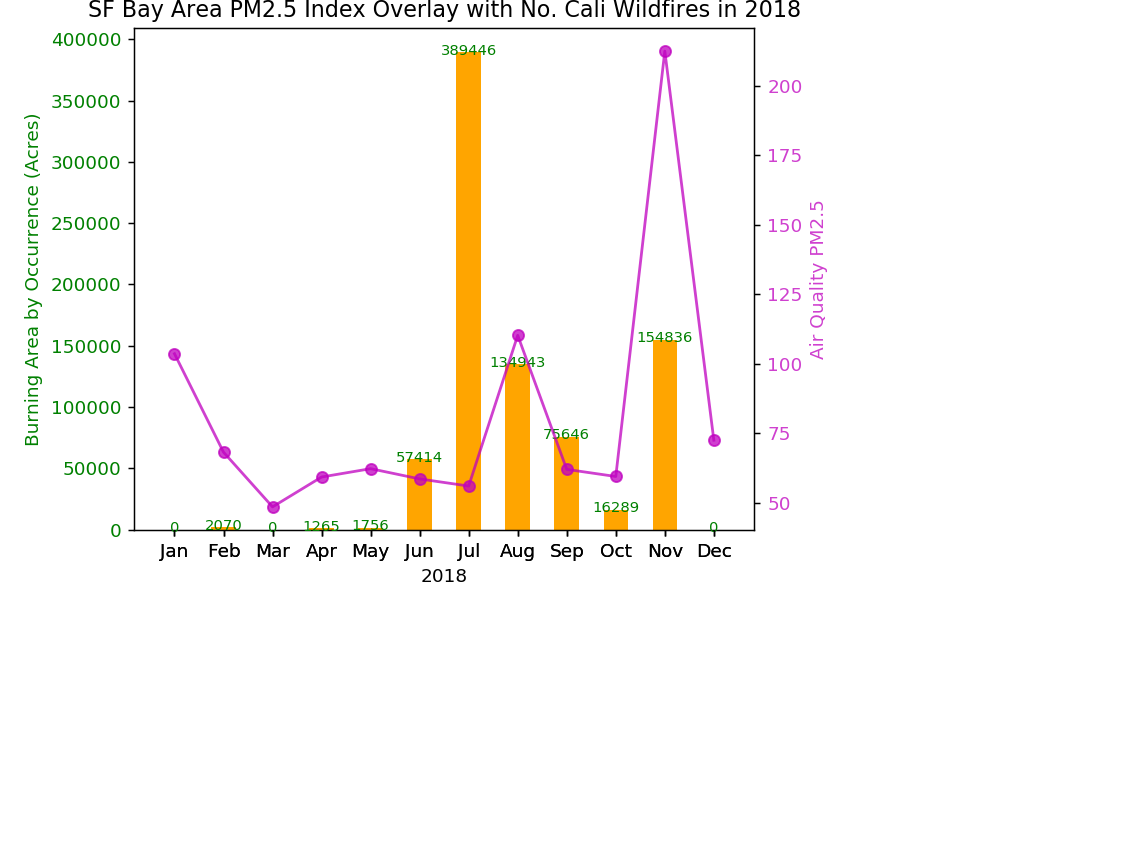

Text(0.5, 1.0, 'SF Bay Area PM2.5 Index Overlay with No. Cali Wildfires in 2018')

In [152]:
# Plot the overlay figure
fig = plt.figure()
ax1 = fig.add_subplot(111)
bars = plt.bar(months, fire1, align='center', linewidth=0, width = 0.5, color='orange')
plt.xticks(months)
plt.xlabel('2018')
plt.yticks(color = 'green')
plt.ylabel('Burning Area by Occurrence (Acres)', color = 'green')

for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2000, str(int(height)) , ha='center', 
                   color='green', fontsize=8, rotation = 'horizontal')

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot(months, air_mean, '-o', color = 'm', alpha = 0.75)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.yticks(color = 'm', alpha = 0.75)
plt.ylabel("Air Quality PM2.5", color = 'm', alpha = 0.75)
plt.tight_layout()
plt.title('SF Bay Area PM2.5 Index Overlay with No. Cali Wildfires in 2018')